# Verzeo - Outstanding Project-3

### Done by : Sanjay Marreddi  
### Email Id  : sanjay.marreddi.19041@iitgoa.ac.in
    

#### First let us import the required Libraries

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from newspaper import Article 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize,sent_tokenize

%matplotlib inline

#### Let us read the Dataset for training our Model
**I have used a Dataset from KAGGLE named `Sentiment Analysis for Financial News`**

In [2]:
news_data = pd.read_excel('news.xlsx')

In [3]:
# Naming the Columns
news_data.columns = ["Sentiment","Text"]

# Data Understanding, Preparation and EDA 

In [4]:
news_data.head()

,Sentiment,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [5]:
news_data.describe()

,Sentiment,Text
count,4845,4845
unique,3,4837
top,neutral,The report profiles 614 companies including ma...
freq,2878,2


In [6]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   Text       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [7]:
# Checking the Number of Missing Values in each Column of the DataFrame

no_of_null_columwise = news_data.isnull().sum() 

no_of_null_columwise[lambda x : x>0] 

Series([], dtype: int64)

#### Now We have no Null Values in our Dataframe !

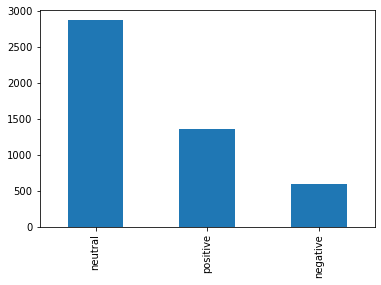

In [8]:
# Visualising the Distribution of Dataset

news_data['Sentiment'].value_counts().plot(kind="bar")
plt.show()

#### Data Cleaning of "Text" column

In [9]:
list_of_stopwords = list(stopwords.words('english'))

In [10]:
# Taking only those rows which has type of description str. 

temp=[]
for i in range(news_data.shape[0]):
    temp.append(type(news_data['Text'].values[i]) == str)

In [11]:
news_data = news_data.loc[temp,:]

In [12]:
stemmer = PorterStemmer()
words = stopwords.words("english")

# Data Cleaning using regex.

news_data['cleaned_text'] = news_data['Text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [13]:
news_data.head()

,Sentiment,Text,cleaned_text
0,neutral,Technopolis plans to develop in stages an area...,technopoli plan develop stage area less squar ...
1,negative,The international electronic industry company ...,the intern electron industri compani elcoteq l...
2,positive,With the new production plant the company woul...,with new product plant compani would increas c...
3,positive,According to the company 's updated strategy f...,accord compani updat strategi year baswar targ...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financ of aspocomp s growth aspocomp aggress p...


In [14]:
X_news_data =  news_data[["cleaned_text"]]   # Independent Variable

y_news_data = news_data[["Sentiment"]]       # Dependent Variables

In [15]:
print (X_news_data.shape)
X_news_data.head()

(4845, 1)


,cleaned_text
0,technopoli plan develop stage area less squar ...
1,the intern electron industri compani elcoteq l...
2,with new product plant compani would increas c...
3,accord compani updat strategi year baswar targ...
4,financ of aspocomp s growth aspocomp aggress p...


In [16]:
print(y_news_data.shape)
y_news_data.head()

(4845, 1)


,Sentiment
0,neutral
1,negative
2,positive
3,positive
4,positive


##### Label Encoding the gender column for ease of Calculation 

In [17]:
label_enc = LabelEncoder()

y_news_data['Sentiment'] = label_enc.fit_transform(y_news_data["Sentiment"]) 

<ipython-input-17-7ec61c336c37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_news_data['Sentiment'] = label_enc.fit_transform(y_news_data["Sentiment"])


In [18]:
y_news_data.head()

,Sentiment
0,1
1,0
2,2
3,2
4,2


#### So we have Encoded the variables as follows : 
    
- 0 - Negative
- 1 - Nuetral
- 2 - Positive

## Web Scrapping

- I have collected data from 3 different news channels namely `Hindustan Times`,`Deccan Chronicle`, `Times of India`
- From each Channel I have collected the URL's of Top 10 Articles published on 29-October-2020
- Then using the Library `Article` I scrapped the data from those 30 Articles for our Sentiment Analysis

In [19]:
# Lists of URL's Collected

Hindustan_29_urls =["https://www.hindustantimes.com/cricket/ipl-2020-kl-rahul-reacts-to-being-named-india-s-limited-overs-vice-captain-for-australia-tour/story-GpQpSx6sgSmoE2rNdIZyuI.html","https://www.hindustantimes.com/columns/the-taste-with-vir-nice-church-attack-it-s-stupid-to-say-the-terror-attack-in-france-was-not-motivated-by-religion/story-5HgjnfUiv7xLvM3ZPIMEnM.html","https://www.hindustantimes.com/analysis/nalayak-gadkari-diagnosed-bureaucratic-malaise-modi-must-inject-the-cure-analysis/story-FqVFVVZQVU4KRSVjYYfN0N.html","https://www.hindustantimes.com/world-news/if-joe-biden-wins-presidential-election-what-would-us-climate-change-pledge-look-like/story-X8DpoenEUhEAYkqOOQSp5M.html","https://www.hindustantimes.com/india-news/shouldn-t-try-to-play-victim-india-roasts-pakistan-for-objecting-to-indo-us-statement/story-M2lbNQ30uxwqI7ENNvhzBM.html","https://www.hindustantimes.com/india-news/india-stands-with-france-in-fight-against-terrorism-pm-modi-condemns-nice-knife-attack/story-QOcfASpJGVHvr6e9n7jC1H.html","https://www.hindustantimes.com/india-news/officials-who-embarrassed-govt-with-rti-response-on-aarogya-setu-face-action/story-L3i7wkvkHgiDGRKfg9qxuK.html","https://www.hindustantimes.com/world-news/french-police-2-dead-in-knife-attack-near-church-in-nice/story-Y2O7MNh7tbzudspuFFzzoI.html","https://www.hindustantimes.com/india-news/govt-revises-bidding-parameters-for-air-india-s-divestment-to-ask-for-bids-at-enterprise-value/story-ebbhEHIAq38zcvWrROa6BN.html","https://www.hindustantimes.com/india-news/what-mike-pompeo-s-attack-on-china-tells-us-about-india-s-new-approach/story-oKCqwFrys5sm4ekXIJ3RMK.html"]
Deccan_29_urls = ["https://www.deccanchronicle.com/entertainment/tollywood/291020/kajal-weds-gautham-in-mumbai-reception-likely-for-tollywood-celebs-in.html","https://www.deccanchronicle.com/nation/in-other-news/291020/six-teenagers-drown-trying-to-save-one-another-in-west-godavari.html","https://www.deccanchronicle.com/nation/in-other-news/291020/complaints-galore-on-mismanagement-of-hyderabad-flood-relief.html","https://www.deccanchronicle.com/world/america/291020/trump-admin-proposes-to-scrap-computerised-lottery-system-to-select-h.html","https://www.deccanchronicle.com/nation/politics/291020/andhra-pradesh-cites-covid-opposes-elections-to-local-bodies.html","https://www.deccanchronicle.com/nation/in-other-news/291020/indian-parliamentary-panel-slams-twitter-in-china-map-dispute.html","https://www.deccanchronicle.com/nation/politics/291020/pm-modi-tears-into-rjds-tejashwi-says-hes-yuvraj-of-jungle-raj.html","https://www.deccanchronicle.com/nation/current-affairs/291020/nia-conducts-raids-at-multiple-locations-including-offices-of-greate.html","https://www.deccanchronicle.com/nation/current-affairs/291020/jaish-militants-killed-in-srinagar-firefight.html","https://www.deccanchronicle.com/nation/politics/291020/mass-movement-against-new-farming-laws-in-telangana-soon-harish-rao.html"]
TOI_29_urls = ["https://timesofindia.indiatimes.com/india/nia-conducts-searches-at-7-locations-in-jk-delhi-in-terror-funding-case/articleshow/78935265.cms","https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-lockdown-extended-in-containment-zones-till-november-30/liveblog/78902091.cms","https://timesofindia.indiatimes.com/world/europe/france-knife-attack-church-sexton-had-throat-slit-while-preparing-for-mass/articleshow/78935099.cms","https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/csk-vs-kkr-live-score-nitish-rana-solid-as-kolkata-knight-riders-eye-big-finish/articleshow/78932887.cms","https://timesofindia.indiatimes.com/india/other-states-uts-have-laws-to-protect-their-land-why-not-jk-omar/articleshow/78935629.cms","https://timesofindia.indiatimes.com/india/nia-conducts-searches-at-7-locations-in-jk-delhi-in-terror-funding-case/articleshow/78935265.cms","https://timesofindia.indiatimes.com/india/pm-modi-condemns-knife-attack-in-france-says-india-stands-with-france/articleshow/78935126.cms","https://timesofindia.indiatimes.com/india/strengthen-testing-tracking-treatment-strategy-during-festivals-centre-to-delhi-kerala-bengal/articleshow/78933409.cms","https://timesofindia.indiatimes.com/india/country-that-gives-shelter-to-un-proscribed-terrorists-should-not-play-victim-india-to-pakistan/articleshow/78934516.cms","https://timesofindia.indiatimes.com/india/nia-conducts-searches-at-4-locations-in-assam-and-maharashtra-in-delhi-gold-smuggling-case/articleshow/78934411.cms"]

# Lists for Storing the Data after Web Scrapping 

Deccan_29_data =[]
Hindustan_29_data =[]
TOI_29_data = []

In [20]:
"""
Defining a function that does the Web Scrapping by taking the List of URL's and populates the list with the data after
scrapping the data from respective URL's
"""

def News_Summary(News_Channel_urls,News_Channel_Data):
    
    for url in News_Channel_urls:
        
        #Instantating article with ENGLISH (en for English)
        article = Article(url, language="en") 

        # Download the article 
        article.download() 

        # Parse the article 
        article.parse() 

        # Perform natural language processing ie..nlp 
        article.nlp() 

        # To extract Title from the article
        Title = article.title
        
        # To extract Text from the article
        Text = article.text
        
        # To extract Summary from the article
        Summary = article.summary
        
        # To extract Keywords from the article
        Keywords =  article.keywords
        
        # Definign our own data using above info for Training
        data = Title
        
        News_Channel_Data.append(data)
        

In [21]:
# Calling the Above Function

News_Summary(Hindustan_29_urls,Hindustan_29_data)
News_Summary(Deccan_29_urls,Deccan_29_data)
News_Summary(TOI_29_urls,TOI_29_data)

C:\Users\RITCDEV01\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [22]:
# Creating a Dataframe from the Data Scrapped

news_dict = { 'Hindustan_Times':Hindustan_29_data, 'Deccan_Chronicle': Deccan_29_data, 'Times_of_India': TOI_29_data}  

latest_news = pd.DataFrame(news_dict) 

latest_news.head() 

,Hindustan_Times,Deccan_Chronicle,Times_of_India
0,IPL 2020: KL Rahul reacts to being named India...,Kajal weds Gautham in Mumbai: Reception likely...,NIA conducts searches at 7 locations in J&amp;...
1,The Taste with Vir: It’s stupid to say the ter...,Six teenagers drown trying to save one another...,Coronavirus: Russia's vaccine trial paused as ...
2,‘Nalayak’: Gadkari diagnosed bureaucratic mala...,Complaints galore on mismanagement of Hyderaba...,France knife attack: Church sexton had throat ...
3,"If Joe Biden wins presidential election, what ...",Trump admin proposes to scrap computerised lot...,CSK vs KKR Highlights: Chennai Super Kings bea...
4,‘Shouldn’t try to play victim’: India roasts P...,"Andhra Pradesh cites COVID, opposes elections ...","Other states, UTs have laws to protect their l..."



#### Data Cleaning of "Hindustan Times" column

In [23]:
# The Process is similar to that of Data Cleaning done for "Text" column of news_data 

# Taking only those rows which has type of description str. 
temp=[]
for i in range(latest_news.shape[0]):
    temp.append(type(latest_news['Hindustan_Times'].values[i]) == str)
    
latest_news = latest_news.loc[temp,:]

stemmer = PorterStemmer()
words = stopwords.words("english")

# Data Cleaning using regex.
latest_news['cleaned_Hindustan_Times'] = latest_news['Hindustan_Times'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [24]:
latest_news.head()

,Hindustan_Times,Deccan_Chronicle,Times_of_India,cleaned_Hindustan_Times
0,IPL 2020: KL Rahul reacts to being named India...,Kajal weds Gautham in Mumbai: Reception likely...,NIA conducts searches at 7 locations in J&amp;...,ipl kl rahul react name india limit over vice ...
1,The Taste with Vir: It’s stupid to say the ter...,Six teenagers drown trying to save one another...,Coronavirus: Russia's vaccine trial paused as ...,the tast vir it stupid say terror attack franc...
2,‘Nalayak’: Gadkari diagnosed bureaucratic mala...,Complaints galore on mismanagement of Hyderaba...,France knife attack: Church sexton had throat ...,nalayak gadkari diagnos bureaucrat malais modi...
3,"If Joe Biden wins presidential election, what ...",Trump admin proposes to scrap computerised lot...,CSK vs KKR Highlights: Chennai Super Kings bea...,if joe biden win presidenti elect would us cli...
4,‘Shouldn’t try to play victim’: India roasts P...,"Andhra Pradesh cites COVID, opposes elections ...","Other states, UTs have laws to protect their l...",shouldn tri play victim india roast pakistan o...


#### Data Cleaning of "Deccan Chronicle	" column

In [25]:
# The Process is similar to that of Data Cleaning done for "Text" column of news_data 

# Taking only those rows which has type of description str. 
temp=[]
for i in range(latest_news.shape[0]):
    temp.append(type(latest_news['Deccan_Chronicle'].values[i]) == str)
        
latest_news = latest_news.loc[temp,:]

stemmer = PorterStemmer()
words = stopwords.words("english")

# Data Cleaning using regex.
latest_news['cleaned_Deccan_Chronicle'] = latest_news['Deccan_Chronicle'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [26]:
latest_news.head()

,Hindustan_Times,Deccan_Chronicle,Times_of_India,cleaned_Hindustan_Times,cleaned_Deccan_Chronicle
0,IPL 2020: KL Rahul reacts to being named India...,Kajal weds Gautham in Mumbai: Reception likely...,NIA conducts searches at 7 locations in J&amp;...,ipl kl rahul react name india limit over vice ...,kajal wed gautham mumbai recept like tollywood...
1,The Taste with Vir: It’s stupid to say the ter...,Six teenagers drown trying to save one another...,Coronavirus: Russia's vaccine trial paused as ...,the tast vir it stupid say terror attack franc...,six teenag drown tri save one anoth west godavari
2,‘Nalayak’: Gadkari diagnosed bureaucratic mala...,Complaints galore on mismanagement of Hyderaba...,France knife attack: Church sexton had throat ...,nalayak gadkari diagnos bureaucrat malais modi...,complaint galor mismanag hyderabad flood relief
3,"If Joe Biden wins presidential election, what ...",Trump admin proposes to scrap computerised lot...,CSK vs KKR Highlights: Chennai Super Kings bea...,if joe biden win presidenti elect would us cli...,trump admin propos scrap computeris lotteri sy...
4,‘Shouldn’t try to play victim’: India roasts P...,"Andhra Pradesh cites COVID, opposes elections ...","Other states, UTs have laws to protect their l...",shouldn tri play victim india roast pakistan o...,andhra pradesh cite covid oppos elect local bodi


#### Data Cleaning of "Hindustan Times" column

In [27]:
# The Process is similar to that of Data Cleaning done for "Text" column of news_data 

# Taking only those rows which has type of description str. 
temp=[]
for i in range(latest_news.shape[0]):
    temp.append(type(latest_news['Times_of_India'].values[i]) == str)
        
latest_news = latest_news.loc[temp,:]

stemmer = PorterStemmer()
words = stopwords.words("english")

# Data Cleaning using regex.
latest_news['cleaned_Times_of_India'] = latest_news['Times_of_India'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [28]:
latest_news.head()

,Hindustan_Times,Deccan_Chronicle,Times_of_India,cleaned_Hindustan_Times,cleaned_Deccan_Chronicle,cleaned_Times_of_India
0,IPL 2020: KL Rahul reacts to being named India...,Kajal weds Gautham in Mumbai: Reception likely...,NIA conducts searches at 7 locations in J&amp;...,ipl kl rahul react name india limit over vice ...,kajal wed gautham mumbai recept like tollywood...,nia conduct search locat j amp k delhi terror ...
1,The Taste with Vir: It’s stupid to say the ter...,Six teenagers drown trying to save one another...,Coronavirus: Russia's vaccine trial paused as ...,the tast vir it stupid say terror attack franc...,six teenag drown tri save one anoth west godavari,coronaviru russia vaccin trial paus clinic run...
2,‘Nalayak’: Gadkari diagnosed bureaucratic mala...,Complaints galore on mismanagement of Hyderaba...,France knife attack: Church sexton had throat ...,nalayak gadkari diagnos bureaucrat malais modi...,complaint galor mismanag hyderabad flood relief,franc knife attack church sexton throat slit p...
3,"If Joe Biden wins presidential election, what ...",Trump admin proposes to scrap computerised lot...,CSK vs KKR Highlights: Chennai Super Kings bea...,if joe biden win presidenti elect would us cli...,trump admin propos scrap computeris lotteri sy...,csk vs kkr highlight chennai super king beat k...
4,‘Shouldn’t try to play victim’: India roasts P...,"Andhra Pradesh cites COVID, opposes elections ...","Other states, UTs have laws to protect their l...",shouldn tri play victim india roast pakistan o...,andhra pradesh cite covid oppos elect local bodi,other state ut law protect land j amp k omar a...



# Sentiment Analysis

We can choose any algorithm from below : 
- Naive Bayes Algorithm 
- Support Vector Machine Algorithm 
- Logistic Regression Algorithm 

#### But Taking into Consideration the Results of ENSEMBLE MACHINE LEARNING MODELLING done as a part of MAJOR PROJECT,

#### I am using `Naive Bayes Algorithm` now !

In [29]:
print (X_news_data.shape)

# Adding a Column to indicate the Channel Name
X_news_data['Channel_Name'] = "Economic Times"
X_news_data.head()

(4845, 1)


<ipython-input-29-39320b8ee855>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_news_data['Channel_Name'] = "Economic Times"


,cleaned_text,Channel_Name
0,technopoli plan develop stage area less squar ...,Economic Times
1,the intern electron industri compani elcoteq l...,Economic Times
2,with new product plant compani would increas c...,Economic Times
3,accord compani updat strategi year baswar targ...,Economic Times
4,financ of aspocomp s growth aspocomp aggress p...,Economic Times


In [30]:
print(y_news_data.shape)
y_news_data.head()

(4845, 1)


,Sentiment
0,1
1,0
2,2
3,2
4,2


In [31]:
print(latest_news.shape)
latest_news.head()

(10, 6)


,Hindustan_Times,Deccan_Chronicle,Times_of_India,cleaned_Hindustan_Times,cleaned_Deccan_Chronicle,cleaned_Times_of_India
0,IPL 2020: KL Rahul reacts to being named India...,Kajal weds Gautham in Mumbai: Reception likely...,NIA conducts searches at 7 locations in J&amp;...,ipl kl rahul react name india limit over vice ...,kajal wed gautham mumbai recept like tollywood...,nia conduct search locat j amp k delhi terror ...
1,The Taste with Vir: It’s stupid to say the ter...,Six teenagers drown trying to save one another...,Coronavirus: Russia's vaccine trial paused as ...,the tast vir it stupid say terror attack franc...,six teenag drown tri save one anoth west godavari,coronaviru russia vaccin trial paus clinic run...
2,‘Nalayak’: Gadkari diagnosed bureaucratic mala...,Complaints galore on mismanagement of Hyderaba...,France knife attack: Church sexton had throat ...,nalayak gadkari diagnos bureaucrat malais modi...,complaint galor mismanag hyderabad flood relief,franc knife attack church sexton throat slit p...
3,"If Joe Biden wins presidential election, what ...",Trump admin proposes to scrap computerised lot...,CSK vs KKR Highlights: Chennai Super Kings bea...,if joe biden win presidenti elect would us cli...,trump admin propos scrap computeris lotteri sy...,csk vs kkr highlight chennai super king beat k...
4,‘Shouldn’t try to play victim’: India roasts P...,"Andhra Pradesh cites COVID, opposes elections ...","Other states, UTs have laws to protect their l...",shouldn tri play victim india roast pakistan o...,andhra pradesh cite covid oppos elect local bodi,other state ut law protect land j amp k omar a...


### Now let us concatenate the Latest News from other 3 channels to our initial dataframe

In [32]:
# Creating a Dataframe of HINDUSTAN TIMES  with similar Dimensions and Column Names to match with our initial Dataframe

data_HT = {'cleaned_text':latest_news['cleaned_Hindustan_Times'].tolist() ,
        'Channel_Name': 'Hindustan_Times' }

df_HT = pd.DataFrame (data_HT, columns = ['cleaned_text','Channel_Name'])

# Creating a Dataframe of DECCAN CHRONICLE  with similar Dimensions and Column Names to match with our initial Dataframe

data_DC = {'cleaned_text':latest_news['cleaned_Deccan_Chronicle'].tolist() ,
        'Channel_Name': 'Deccan_Chronicle' }

df_DC = pd.DataFrame (data_DC, columns = ['cleaned_text','Channel_Name'])

# Creating a Dataframe of TIMES OF INDIA  with similar Dimensions and Column Names to match with our initial Dataframe

data_TOI = {'cleaned_text':latest_news['cleaned_Times_of_India'].tolist() ,
        'Channel_Name': 'Times_of_India' }

df_TOI = pd.DataFrame (data_TOI, columns = ['cleaned_text','Channel_Name'])

In [33]:
# Combining the above Dataframes one at a time with our initial Dataframe

X_news_data=pd.concat([X_news_data,df_HT],axis=0)
X_news_data=pd.concat([X_news_data,df_DC],axis=0)
X_news_data=pd.concat([X_news_data,df_TOI],axis=0)

In [34]:
X_news_data['Channel_Name'].unique()

array(['Economic Times', 'Hindustan_Times', 'Deccan_Chronicle',
       'Times_of_India'], dtype=object)

In [35]:
# Instantiating the Vectorizer

count_vector=CountVectorizer()

In [36]:
# Vectorizing the cleaned_text column

X_news_data_vectorized = count_vector.fit_transform(X_news_data["cleaned_text"])

X_news_data_vectorized

<4875x6839 sparse matrix of type '<class 'numpy.int64'>'
	with 57456 stored elements in Compressed Sparse Row format>

In [37]:
# Splitting the data into Training and Testing Sets

# Notice that we are passing data of Independent Variables till `4845` which is the size of the data we had Labels for.
# To be precise we are training the Model with the first `4845` rows of dataset which corresponds to `Economic Times` 

X_train,X_test,Y_train,Y_test=train_test_split(X_news_data_vectorized[:4845],y_news_data["Sentiment"], train_size=0.8)

In [38]:
# Instantiating the Model
naive_bayes = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Fitting the Model and Training it 
naive_bayes.fit(X_train,Y_train)

MultinomialNB()

In [39]:
# Making Prediction on the Test Data
Y_predicted=naive_bayes.predict(X_test)

# Evaluating the Accuracy of the Model
accuracy_score(Y_predicted,Y_test)

0.6780185758513931

### Now let us use our Trained Model to make Prediction and Sentiment Analysis of News Articles

### Sentiment Analysis on `Hindustan Times` News Articles 

In [40]:
# Since we have 10 articles of each Channel Index ranges from 4845 to 4845+10

Y_predicted_HT = naive_bayes.predict(X_news_data_vectorized[4845:4845+10])

print(Y_predicted_HT)

[1 0 0 1 2 0 0 0 1 1]


In [41]:
negative = 0
nuetral  = 0
positive = 0

# Counting Number of Positive, Negative, Nuetral Articles

for pred in Y_predicted_HT :
    if pred == 0 :
        negative+=1
    if pred == 1 :
        nuetral+=1
    if pred == 2 :
        positive+=1
    
print("On an average, Among 10 Top Articles choosen from the `Hindustan Times` News Channels\n" 
       "Number of positive sentiment articles present each day is \t", positive, "\n",
       "Number of negative sentiment articles present each day is \t", negative, "\n",
       "Number of nuetral sentiment articles present each day is \t",  nuetral, "\n",)

On an average, Among 10 Top Articles choosen from the `Hindustan Times` News Channels
Number of positive sentiment articles present each day is 	 1 
 Number of negative sentiment articles present each day is 	 5 
 Number of nuetral sentiment articles present each day is 	 4 



### Sentiment Analysis on `Deccan Chronicle` News Articles 

In [42]:
# Since we have 10 articles of each Channel Index ranges from 4855 to 4855+10 (After Hindustan Times, We have 10 )

Y_predicted_DC = naive_bayes.predict(X_news_data_vectorized[4855:4855+10])
print(Y_predicted_DC)

[0 2 0 2 1 2 0 1 0 1]


In [43]:
negative = 0
nuetral  = 0
positive = 0

# Counting Number of Positive, Negative, Nuetral Articles

for pred in Y_predicted_DC :
    if pred == 0 :
        negative+=1
    if pred == 1 :
        nuetral+=1
    if pred == 2 :
        positive+=1
    
print("On an average, Among 10 Top Articles choosen from the `Deccan Chronicle` News Channels\n" 
       "Number of positive sentiment articles present each day is \t", positive, "\n",
       "Number of negative sentiment articles present each day is \t", negative, "\n",
       "Number of nuetral sentiment articles present each day is \t",  nuetral, "\n",)

On an average, Among 10 Top Articles choosen from the `Deccan Chronicle` News Channels
Number of positive sentiment articles present each day is 	 3 
 Number of negative sentiment articles present each day is 	 4 
 Number of nuetral sentiment articles present each day is 	 3 



### Sentiment Analysis on `Times of India` News Articles 

In [44]:
# Since we have 10 articles of each Channel Index ranges from 4865 to 4865+10 (After Deccan Chronicle, We have 10 )

Y_predicted_TOI = naive_bayes.predict(X_news_data_vectorized[4865:4865+10])
print(Y_predicted_TOI)

[1 1 0 0 1 1 0 2 2 0]


In [45]:
negative = 0
nuetral  = 0
positive = 0

# Counting Number of Positive, Negative, Nuetral Articles

for pred in Y_predicted_TOI :
    if pred == 0 :
        negative+=1
    if pred == 1 :
        nuetral+=1
    if pred == 2 :
        positive+=1
    
print("On an average, Among 10 Top Articles choosen from the `Times of India` News Channels\n" 
       "Number of positive sentiment articles present each day is \t", positive, "\n",
       "Number of negative sentiment articles present each day is \t", negative, "\n",
       "Number of nuetral sentiment articles present each day is \t",  nuetral, "\n",)

On an average, Among 10 Top Articles choosen from the `Times of India` News Channels
Number of positive sentiment articles present each day is 	 2 
 Number of negative sentiment articles present each day is 	 4 
 Number of nuetral sentiment articles present each day is 	 4 



#### Hence We Compared 3 different news channels news and find out How many positive, nuetral and negative sentiment articles are present each day

### THE END
#### Thank you VERZEO for this Opportunity !   - Sanjay Marreddi